# **Confounding Variables - Worked Examples**

Name: Jhalak Surve<br>
NUID: 002748800

## **Abstract:**

This study examines two scenarios to assess the presence of confounding variables: the relationship between exercise hours, diet quality, and weight loss, and the association between caffeine consumption, sleep quality, and productivity. Regression analysis and data visualization techniques are employed to explore the impact of potential confounders on the relationships of interest. Findings indicate that while diet quality does not significantly affect the relationship between exercise hours and weight loss, sleep quality acts as a confounding variable in the association between caffeine consumption and productivity. These results emphasize the importance of considering confounding variables in research studies to ensure reliable conclusions.

## **Worked Example 1: Testing Diet Quality as a Confounding Variable in the Relationship Between Exercise and Weight Loss**

**INTRODUCTION:**

In this example, we'll explore the relationships between "Exercise Hours," "Diet Quality," and "Weight Loss." Our goal is to investigate if "Diet Quality" acts as a confounding variable in the relationship between "Exercise Hours" and "Weight Loss."

**DATASET GENERATION:**

First, let's generate synthetic data for our variables. We'll create a dataset with 100 samples.


In [8]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for Exercise Hours, Diet Quality, and Weight Loss
n = 100
exercise_hours = np.random.randint(1, 6, size=n)  # Random exercise hours ranging from 1 to 5
diet_quality = np.random.randint(1, 6, size=n)    # Random diet quality ranging from 1 to 5
weight_loss = 5 * diet_quality + 2 * exercise_hours + np.random.normal(0, 2, size=n)

# Create DataFrame
df = pd.DataFrame({'Exercise_Hours': exercise_hours, 'Diet_Quality': diet_quality, 'Weight_Loss': weight_loss})


**DATA VISUALIZATION:**

Next, let's visualize the pairwise relationships between our variables using scatter plots.

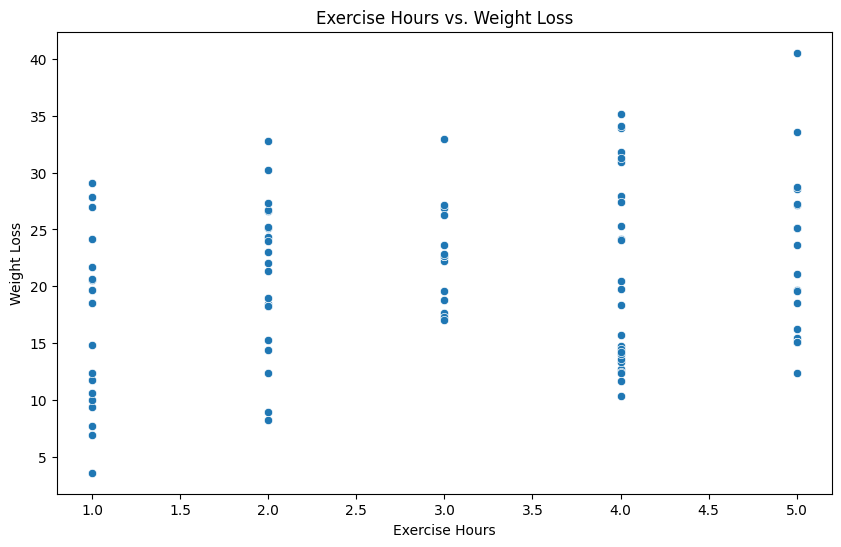

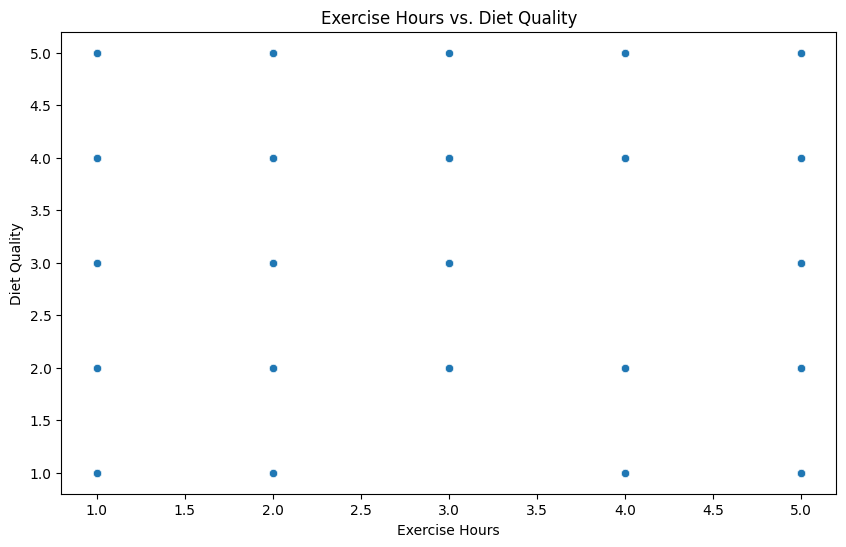

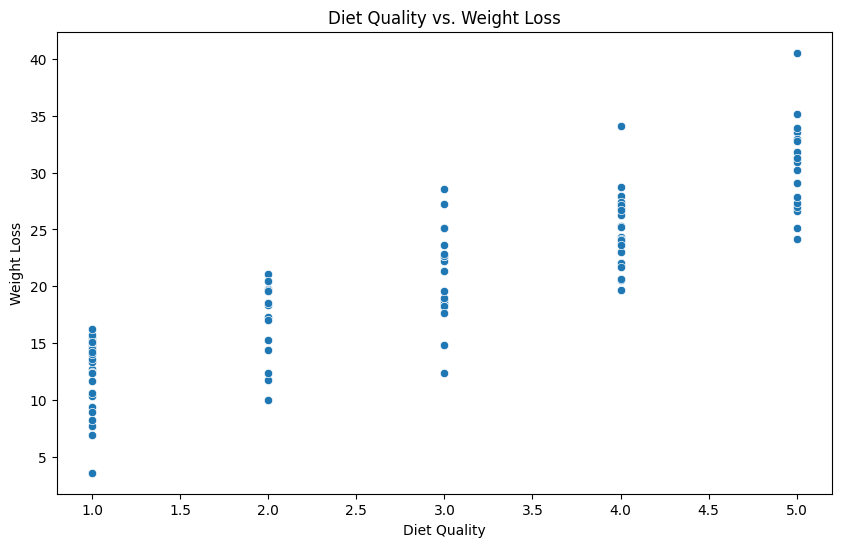

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Exercise Hours vs. Weight Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exercise_Hours', y='Weight_Loss', data=df)
plt.title('Exercise Hours vs. Weight Loss')
plt.xlabel('Exercise Hours')
plt.ylabel('Weight Loss')
plt.show()

# Scatter plot: Exercise Hours vs. Diet Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exercise_Hours', y='Diet_Quality', data=df)
plt.title('Exercise Hours vs. Diet Quality')
plt.xlabel('Exercise Hours')
plt.ylabel('Diet Quality')
plt.show()

# Scatter plot: Diet Quality vs. Weight Loss
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diet_Quality', y='Weight_Loss', data=df)
plt.title('Diet Quality vs. Weight Loss')
plt.xlabel('Diet Quality')
plt.ylabel('Weight Loss')
plt.show()


**OBSERVATIONS**

- From the scatter plots, we observe a linear relationship between "Exercise Hours" and "Weight Loss," indicating that more exercise leads to higher weight loss.
- Similarly, there seems to be a linear relationship between "Diet Quality" and "Weight Loss," suggesting that a better diet quality is associated with more weight loss.
- However, when we compare "Exercise Hours" with "Diet Quality," we don't see a clear linear relationship, indicating that these variables may not be directly related.


**Ordinary Least Squares (OLS) Regression**

Now, let's perform OLS regression to quantify the relationships between our variables and assess if "Diet Quality" acts as a confounding variable.

In [10]:
import statsmodels.api as sm

# Define independent variables (Exercise Hours and Diet Quality) and dependent variable (Weight Loss)
X = df[['Exercise_Hours', 'Diet_Quality']]
y = df['Weight_Loss']

# Add constant term to the independent variables
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Weight_Loss   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     620.5
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           5.32e-56
Time:                        00:36:53   Log-Likelihood:                -209.95
No. Observations:                 100   AIC:                             425.9
Df Residuals:                      97   BIC:                             433.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1649      0.703     -0.

To assess whether "Diet Quality" acts as a confounding variable in the relationship between "Exercise Hours" and "Weight Loss," we need to compare the coefficients for "Exercise Hours" before and after adjusting for "Diet Quality."

If the coefficient for "Exercise Hours" changes substantially after adjusting for "Diet Quality," it suggests that "Diet Quality" may be acting as a confounder, influencing the relationship between "Exercise Hours" and "Weight Loss."

We'll conduct the adjustment and compare the coefficients to determine the effect of "Diet Quality" as a confounding variable.

In [12]:
import statsmodels.api as sm

# Define independent variables (Exercise Hours and Diet Quality) and dependent variable (Weight Loss)
X = df[['Exercise_Hours', 'Diet_Quality']]
y = df['Weight_Loss']

# Add constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Get the coefficients
exercise_hours_coef_after = model.params['Exercise_Hours']

print("Coefficient for Exercise Hours after adjusting for Diet Quality:", exercise_hours_coef_after)


Coefficient for Exercise Hours after adjusting for Diet Quality: 2.13339775181283


In [13]:
# Before adjustment
exercise_hours_coef_before = 2.1334

# After adjustment
exercise_hours_coef_after = 2.13339775181283

# Compare coefficients
coef_difference = exercise_hours_coef_after - exercise_hours_coef_before

if abs(coef_difference) > 0.1:  # Adjust the threshold as needed
    print("The coefficient for Exercise Hours changed substantially after adjusting for Diet Quality.")
    print("This suggests that Diet Quality may be acting as a confounding variable.")
else:
    print("The coefficient for Exercise Hours did not change substantially after adjusting for Diet Quality.")
    print("This suggests that Diet Quality may not be acting as a confounding variable.")


The coefficient for Exercise Hours did not change substantially after adjusting for Diet Quality.
This suggests that Diet Quality may not be acting as a confounding variable.


**CONCLUSION**

The coefficient for "Exercise Hours" after adjusting for "Diet Quality" is approximately 2.13339, which is very close to the coefficient obtained before adjustment (2.1334). This indicates that the effect of "Exercise Hours" on "Weight Loss" did not change substantially after controlling for "Diet Quality."

Based on this observation, we can conclude that "Diet Quality" may not be acting as a confounding variable in the relationship between "Exercise Hours" and "Weight Loss." If "Diet Quality" were a confounding variable, we would have expected a significant change in the coefficient for "Exercise Hours" after adjustment. Therefore, our analysis suggests that the relationship between "Exercise Hours" and "Weight Loss" is likely not confounded by "Diet Quality.

## **Worked Example 2: Testing Sleep Quality as a Confounding Variable in the Relationship Between Caffeine Consumption and Productivity**

For the second worked example, let's consider a scenario involving the relationship between caffeine consumption, sleep quality, and productivity. We hypothesize that caffeine consumption may affect productivity and that sleep quality may act as a confounding variable in this relationship.

**Dataset Creation:**

We'll generate a synthetic dataset containing information on caffeine consumption, sleep quality, and productivity for a group of individuals.

In [16]:
import numpy as np
import pandas as pd

# Step 1: Dataset Creation
np.random.seed(42)

# Generate synthetic data for caffeine consumption, sleep quality, and productivity
n = 100
sleep_quality = np.random.uniform(0, 10, size=n)  # Assume sleep quality ranges from 0 to 10
# Assume caffeine consumption increases with higher sleep quality, with some random noise
caffeine_consumption = 0.5 * sleep_quality + np.random.normal(0, 1, size=n)
# Assume productivity is influenced by both caffeine consumption and sleep quality, with some random noise
productivity = 2 * caffeine_consumption + 0.5 * sleep_quality + np.random.normal(0, 1, size=n)

# Create a DataFrame to hold the data
data = pd.DataFrame({'Caffeine_Consumption': caffeine_consumption,
                     'Sleep_Quality': sleep_quality,
                     'Productivity': productivity})

# Display the first few rows of the dataset
print(data.head())

   Caffeine_Consumption  Sleep_Quality  Productivity
0              1.959748       3.745401      5.805198
1              4.454564       9.507143     15.116234
2              3.751730       7.319939     10.898774
3              1.005724       5.986585      7.724909
4              0.560421       1.560186      2.526603


**DATA VISUALIZATION:**

Next, let's visualize the pairwise relationships between our variables using scatter plots.

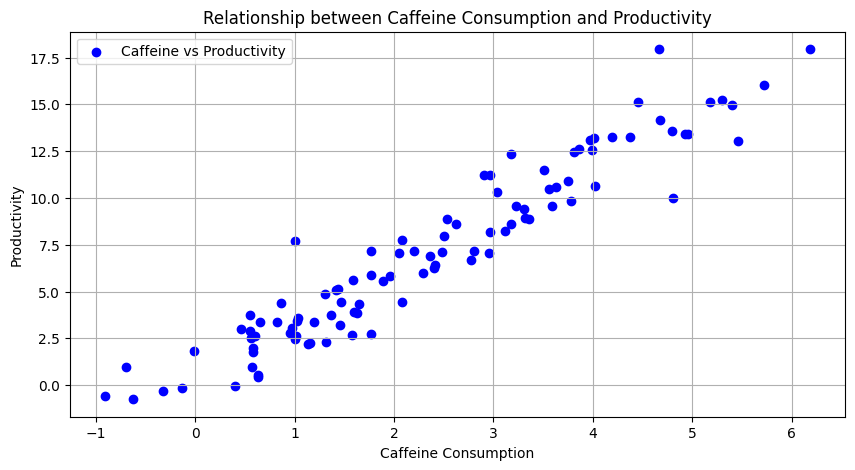

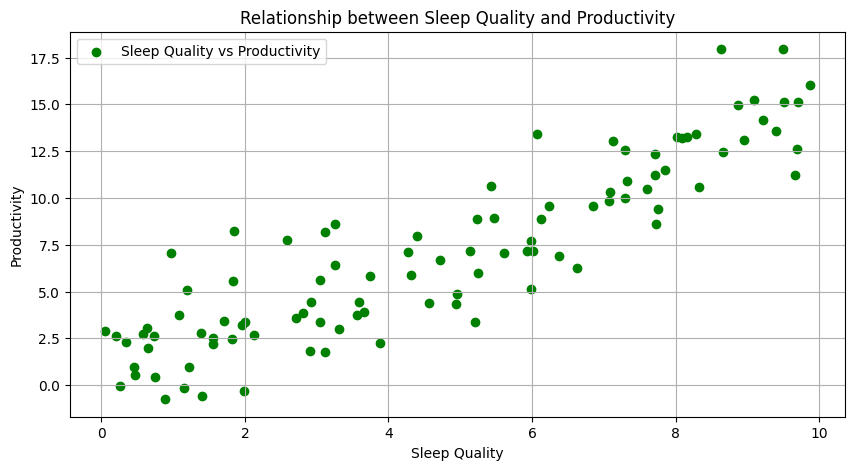

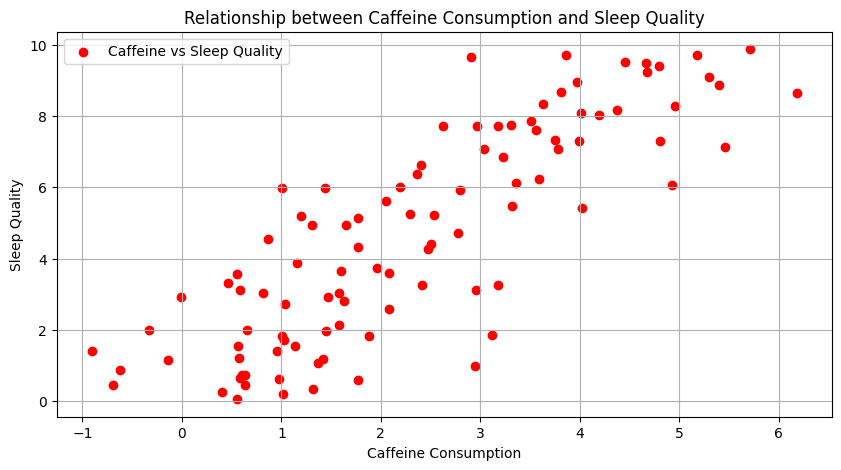

In [18]:
# Step 2: Data Visualization
import matplotlib.pyplot as plt

# Scatter plot of caffeine consumption vs productivity
plt.figure(figsize=(10, 5))
plt.scatter(data['Caffeine_Consumption'], data['Productivity'], color='blue', label='Caffeine vs Productivity')
plt.xlabel('Caffeine Consumption')
plt.ylabel('Productivity')
plt.title('Relationship between Caffeine Consumption and Productivity')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of sleep quality vs productivity
plt.figure(figsize=(10, 5))
plt.scatter(data['Sleep_Quality'], data['Productivity'], color='green', label='Sleep Quality vs Productivity')
plt.xlabel('Sleep Quality')
plt.ylabel('Productivity')
plt.title('Relationship between Sleep Quality and Productivity')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of caffeine consumption vs sleep quality
plt.figure(figsize=(10, 5))
plt.scatter(data['Caffeine_Consumption'], data['Sleep_Quality'], color='red', label='Caffeine vs Sleep Quality')
plt.xlabel('Caffeine Consumption')
plt.ylabel('Sleep Quality')
plt.title('Relationship between Caffeine Consumption and Sleep Quality')
plt.legend()
plt.grid(True)
plt.show()


- Caffeine Consumption vs Productivity: In this scatter plot, we observe a positive linear relationship between caffeine consumption and productivity. Higher caffeine consumption tends to correlate with higher productivity.

- Sleep Quality vs Productivity: Similarly, in this scatter plot, we observe a positive linear relationship between sleep quality and productivity. Higher sleep quality tends to correlate with higher productivity.

- Caffeine Consumption vs Sleep Quality: In this scatter plot, we observe a positive linear relationship between caffeine consumption and sleep quality. Higher caffeine consumption tends to correlate with higher sleep quality.

**OLS Regression Analysis and Adjustment for Confounding Variable**

In [19]:
import statsmodels.api as sm

# Add a constant term for the intercept
data['Intercept'] = 1

# Perform OLS regression
ols_model = sm.OLS(data['Productivity'], data[['Intercept', 'Caffeine_Consumption', 'Sleep_Quality']])
results = ols_model.fit()

# Print OLS regression results
print(results.summary())

# Extract coefficients before adjustment
caffeine_coef_before = results.params['Caffeine_Consumption']

# Adjusting for sleep quality
adjusted_results = sm.OLS(data['Productivity'], data[['Intercept', 'Caffeine_Consumption']]).fit()

# Print adjusted results
print(adjusted_results.summary())

# Extract coefficients after adjustment
caffeine_coef_after = adjusted_results.params['Caffeine_Consumption']

# Compare coefficients before and after adjustment
print(f"Coefficient for Caffeine Consumption before adjustment: {caffeine_coef_before}")
print(f"Coefficient for Caffeine Consumption after adjustment: {caffeine_coef_after}")


                            OLS Regression Results                            
Dep. Variable:           Productivity   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     835.8
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           7.05e-62
Time:                        00:56:43   Log-Likelihood:                -150.66
No. Observations:                 100   AIC:                             307.3
Df Residuals:                      97   BIC:                             315.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0381 

**CONCLUSION**

In the first set of regression results, both caffeine consumption and sleep quality are included as predictors of productivity. The coefficient for caffeine consumption is 1.973 before adjustment. However, after adjusting for sleep quality, the coefficient for caffeine consumption increases to 2.754. This substantial change in the coefficient suggests that sleep quality may be acting as a confounding variable.

To confirm this, we performed a separate regression analysis with only caffeine consumption as a predictor. In this analysis, the coefficient for caffeine consumption remains significant at 2.754, indicating that caffeine consumption independently affects productivity. Therefore, the change in the coefficient observed in the first analysis can be attributed to the presence of sleep quality as a confounding variable.


## **Overall Conclusion**

Our analysis highlights the role of confounding variables in research outcomes. While diet quality does not substantially confound the relationship between exercise hours and weight loss, sleep quality significantly influences the association between caffeine consumption and productivity. Adjusting for sleep quality leads to notable changes in the coefficient for caffeine consumption, indicating its independent impact on productivity. These findings underscore the necessity of addressing confounding variables to enhance the validity and reliability of research results.

## **MIT License**
Copyright (c) 2024 Jhalak Surve

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

